In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG', 'DOCS',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG',
    'IDXX', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PAC', 'PANW',
    'PAYC', 'PINS', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN',
    'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM',
    'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD',
    'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'APT', 'BYRN', 'CIZN', 'CUBE', 'EP', 'FCUV', 'GCBC', 'GME',
    'INTZ', 'KREF', 'MCVT', 'MICS', 'PETV', 'POWW', 'PRPH', 'RA', 'RVP',
    'WAVD', 'WKHS', 'VIRT', 'ZYXI']
BEST_WEIGHTED = [
    'ABM', 'AMRK', 'CELH', 'CTBB', 'CTDD', 'EVA', 'EXR', 'FCPT', 'FND',
    'GBOX', 'INSW', 'KNSL', 'LFMD', 'MNMD', 'MYOV', 'NSA', 'OMQS',
    'RRR', 'SBOW', 'STOR']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

69

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-09-17', datetime.date(2022, 9, 17))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  114 of 114 completed
Generating derived columns...
AAPL... ABM... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BYND... BYRN... CELH... CHWY... CIZN... CRWD... CTBB... CTDD... CUBE... DDOG... DOCS... DOCU... DUOL... EDIT... EP... ETSY... EVA... EXR... FCPT... FCUV... FLGT... FND... GBOX... GCBC... GH... GME... GMED... GOOG... IDXX... INSW... INTG... INTZ... ISRG... JD... KNSL... KREF... LFMD... LSPD... LULU... MCVT... MDB... MELI... MICS... MNMD... MNST... MSFT... MTCH... MYOV... NSA... NVCR... NVDA... OKTA... OMQS... OPEN... PAC... PANW... PAYC... PETV... PINS... POWW... PRPH... PYPL... QDEL... RA... RBLX... RDFN... RGEN... RIVN... ROKU... RRR... RVLV... RVP... SBOW... SE... SHOP... SNOW... STOR... TASK... TDOC... TEAM... TREX... TTD... TTWO... TWLO... TWTR... TYL... UPST... VEEV... VIRT... VLD... WAVD... WKHS... XPEV... ZEN... ZM... ZYXI... ^GSPC... ^IXIC... ^NYA... 


In [5]:
data['Date'].tail()

2512   2022-09-12
2513   2022-09-13
2514   2022-09-14
2515   2022-09-15
2516   2022-09-16
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.998720
2       1.001186
3       0.999459
4       0.999925
5       0.997767
          ...   
2512    1.010584
2513    0.956763
2514    1.003387
2515    0.988682
2516    0.992818
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.006585
2,1.009519
3,1.001484
4,1.005891
5,1.000000
...,...
2512,1.022215
2513,0.972965
2514,1.018977
2515,1.003844


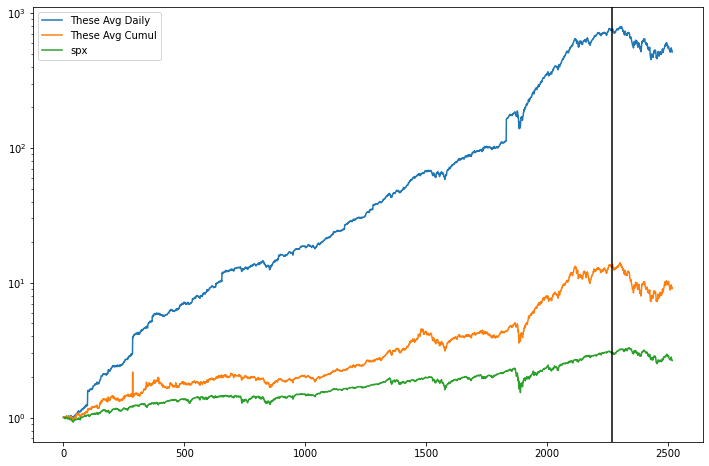

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-09-17,NaN,NaN
1,2012-09-18,1.011762,1.011762
2,2012-09-19,1.012554,1.011604
3,2012-09-20,1.006374,1.003844
4,2012-09-21,1.011436,1.009170


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-09-12,552.841474,9.653186
2513,2022-09-13,528.574999,9.117356
2514,2022-09-14,531.933427,9.299782
2515,2022-09-15,528.501689,9.183183
2516,2022-09-16,514.799054,9.063669


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

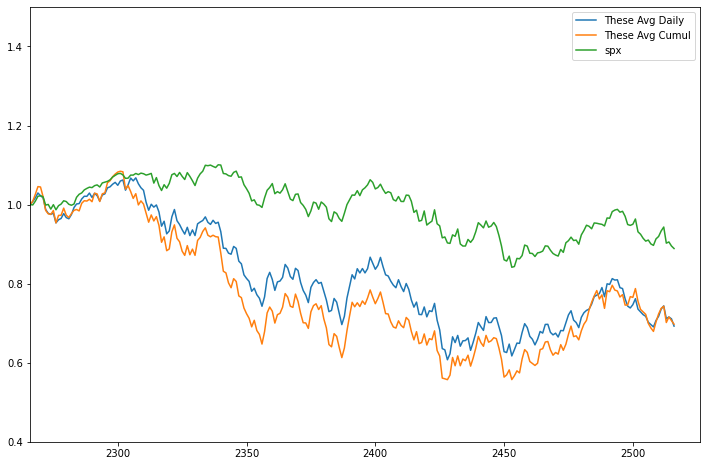

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2457,78.199997,78.199997,78.785004,69.879997,71.690002,4.359270,1.090808,1.097082,1.005752
2458,80.470001,80.470001,81.120003,77.660004,79.809998,4.387884,1.008270,1.029028,1.020588
2459,75.050003,75.050003,81.809998,74.070000,81.400002,4.318155,0.921990,0.932646,1.011557
2460,71.889999,71.889999,78.089996,71.404999,76.199997,4.275137,0.943438,0.957895,1.015323
2461,68.900002,68.900002,71.230003,68.129997,71.129997,4.232656,0.968649,0.958409,0.989428


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2457,78.199997,78.199997,78.785004,69.879997
2458,80.470001,80.470001,81.120003,77.660004
2459,75.050003,75.050003,81.809998,74.070000
2460,71.889999,71.889999,78.089996,71.404999
2461,68.900002,68.900002,71.230003,68.129997


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2457,78.199997,78.199997,78.785004,69.879997,81.120003,77.660004,1.037340,0.993095
2458,80.470001,80.470001,81.120003,77.660004,81.809998,74.070000,1.016652,0.920467
2459,75.050003,75.050003,81.809998,74.070000,78.089996,71.404999,1.040506,0.951432
2460,71.889999,71.889999,78.089996,71.404999,71.230003,68.129997,0.990819,0.947698
2461,68.900002,68.900002,71.230003,68.129997,68.279999,65.209999,0.991001,0.946444


0.05    0.972511
Name: HighMult, dtype: float64


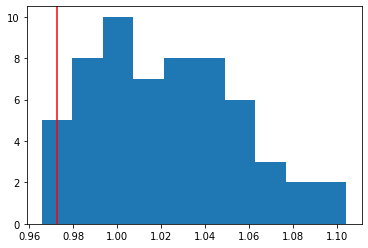

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.015697371611524


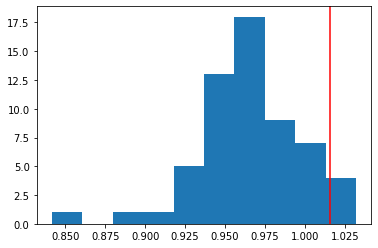

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.015697371611524, 0.9725107768702285)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.010964085404983, 0.9937714332224621)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2457,78.199997,78.199997,78.785004,69.879997,81.120003,77.660004,1.037340,0.993095,0
2458,80.470001,80.470001,81.120003,77.660004,81.809998,74.070000,1.016652,0.920467,1
2459,75.050003,75.050003,81.809998,74.070000,78.089996,71.404999,1.040506,0.951432,0
2460,71.889999,71.889999,78.089996,71.404999,71.230003,68.129997,0.990819,0.947698,0
2461,68.900002,68.900002,71.230003,68.129997,68.279999,65.209999,0.991001,0.946444,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0112304502571132,
 0.9733309719772187,
 1.0173521780339083,
 0.9770878141938952)

In [27]:
get_hilo_mults(aapl)

(1.0063915875326686,
 0.9967612140614411,
 1.0108483398687416,
 0.9933058407405776)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006392,0.996761,1.010848,0.993306
1,ABM,1.005619,0.998938,1.031257,0.975691
2,ABMD,1.002202,0.992292,1.002608,0.991116
3,ABNB,1.016885,0.986341,1.010813,0.989763
4,ADBE,1.005438,0.992778,1.010748,0.969099


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,150.699997,AAPL
ABM,40.130001,ABM
ABMD,258.670013,ABMD
ABNB,118.75,ABNB
ADBE,299.5,ADBE
...,...,...
ZM,78.68,ZM
ZYXI,9.48,ZYXI
^GSPC,3873.330078,^GSPC
^IXIC,11448.400391,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006392,0.996761,1.010848,0.993306,150.699997
1,ABM,1.005619,0.998938,1.031257,0.975691,40.130001
2,ABMD,1.002202,0.992292,1.002608,0.991116,258.670013
3,ABNB,1.016885,0.986341,1.010813,0.989763,118.75
4,ADBE,1.005438,0.992778,1.010748,0.969099,299.5


In [32]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv